# Lab 3: Pytorch Operators and Optimizers

## Assignment: Fashion MNIST Classification

In Lab3, we will use the Fashion MNIST dataset (see video recording for explanation of Fashion MNIST dataset). Similar to previous Lab2, you should design a fully-connected network as well as the pytorch based training/validation/testing process on the classification task. But differently, we will dive into the optimizers, operations or modules that we have learned in the lectures, and to see how they can benefit the capacity of your model.



1. Try different optimizers including RMSProp, Adam and SGD(You can find the corresponding functions in the torch.optim library). Log your training loss and test accuracy. Comparing these optimizers, how do they work? Which one is the best for this task and try to explain it.

2. Analyze the overfitting/underfitting situation of your model. Try to use regularization like L2/L1, Dropout layers, etc. to improve your performance. How does your regularization work? And how do you balance your regularization and the loss optimization?

3. Try different initialization ways like random normal, Xavier and He (Kaiming) etc. How can these initialization affect your training process and performance? 

4. Try normalization like batch normalization or layer normalization, whether these normalization methods can help your training or improve your performance?

5. To further improve the performance, you can also choose your own hyperparameters, including:
- Number of layers
- Number of neurons in each layer
- Learning rate
- Number of training epochs

For the comparing of different optimizers, regularization, initialization, normalization and hyper-parameters, you are recommended to form a table of the comparison results.  Report your loss as ”loss curve” and accuracy for different settings and draw conclusions. **You can split a small validation set from the training set to help you analyze the effectiveness of different modules better.**

For the convenient implementation of different optimizers, regularization, initialization and normalization, you can always check the tutorial of pytorch library (https://pytorch.org/tutorials/) for some useful funuctions and examples.

#### Assignment Solution <br /> <br />

##### __1. Try different optimizers including RMSProp, Adam and SGD(You can find the corresponding functions in the torch.optim library). Log your training loss and test accuracy. Comparing these optimizers, how do they work? Which one is the best for this task and try to explain it.__

Working of SGD: <br />
In SGD, we compute the gradient of the cost function and performs a parameter update for each example.

Working of RMSProp: <br />
IN RMSProp, we apply exponential moving average to square of gradient values. We then use the result to normalize gradient value that is used in parameter updation.

Working of Adam:
In Adam, we combine momentum with RMSProp to perform gradient descent.
<br />



| Metrics         | SGD         | Adam        | RMSProp     |
| --------------- | ----------- | ----------- | ----------- |
| Training Loss   | 0.434       | 0.235       | 0.311       |
| Test Accuracy   | 0.837       | 0.885       | 0.872       |


Adam works the best out of all the optimization methods. The reason is that it combines RMSProp with momentum So, it looks at the past history to determine in which direction gradient update should happen.

##### __2. Analyze the overfitting/underfitting situation of your model. Try to use regularization like L2/L1, Dropout layers, etc. to improve your performance. How does your regularization work? And how do you balance your regularization and the loss optimization?__

Since Adam performed th best, I proceeded with Adam optimizer. We observe that the model overfits after training for some epochs. To deal with  it, I chose to optimize with l2 regularization and dropout. l2 regularization is basically ridge regression applied to the loss function. Dropout randomly ignores a certain set of neurons in a layer. By adding this penalty, the model is trained such that it does not learn interdependent set of features weights.  

_The regularization was implemented on adam optimizer since it gave the best performance._ <br /><br />
The curves for l2 regulariation and dropout regularzation is in the 2. section of the python notebook. 


I balanced the regularization and loss optimization by seeing the loss curve. If the model was overfitted, then regulairzarion value was increased. 
The graphs can be seen below in Seciton 2 of the results. They list all the regularizations attempted.

l2 regularization values tried:
lambda = {1e-5, 1e-4} 

Dropout values tried:
p = {0.1, 0.2, 0.3}

From the study, dropout (p=0.2) performs the best.


##### __3. Try different initialization ways like random normal, Xavier and He (Kaiming) etc. How can these initialization affect your training process and performance?__

| Metrics         | Random normal     | Xavier      | He (Kaiming)   |
| --------------- | ----------------- | ----------- | -------------- |
| Training Loss   | 1.317             | 0.268       | 0.272          |
| Test Accuracy   | 0.630             | 0.885       | 0.884          |  

Iniitialization can affect the training process if the initial values are extremely divergent, then the alogrithm may never converge. Otherwise, if they are random, then the iterations taken to converge could be very high. This can be seen with random normal initialisation method in the table.


##### __4. Try normalization like batch normalization or layer normalization, whether these normalization methods can help your training or improve your performance?__


I implemented batch normalization. The results I obtained are as follows:
Test accuracy for min validation: 0.8676999807357788 , Training loss: 0.36918814239540587

The accuracy was quite similar. Batch normalization did not have much impact.


##### __5. To further improve the performance, you can also choose your own hyperparameters, including:__
- __Number of layers__
- __Number of neurons in each layer__
- __Learning rate__
- __Number of training epochs__



The hyperparamers I varied are: <br /> <br />

Learning rate from 0.001 -> 0.0001 <br> <br />
Test accuracy for min validation: 0.8892999887466431 , Training loss: 0.2435430852972247
<br /> <br />
Number of epochs from 20 -> 30

Test accuracy for min validation: 0.8928999900817871 , Training loss: 0.2171301260969981






##### 1 a. SGD

In [28]:
import torch
import torchvision


train_batch_size = 50 # Define train batch size
test_batch_size  = 40 # Define test batch size (can be larger than train batch size)


# Use the following code to load and normalize the dataset
train_val_dataset = torchvision.datasets.FashionMNIST('files', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

# Training dataset size
ratio_split, size = .9, len(train_val_dataset)


train_dataset, val_dataset = torch.utils.data.random_split(train_val_dataset, [int(ratio_split * size), size - int(ratio_split * size)])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)

validation_loader = torch.utils.data.DataLoader(val_dataset, batch_size=train_batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('files', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=test_batch_size, shuffle=True)

In [42]:
# For debugging purposes
print(f"Training data size : {train_loader.dataset.__len__()}, Validation data size : {validation_loader.dataset.__len__()}, Test data size : {test_loader.dataset.__len__()}")
print(f"Size of X: {train_dataset[0][0].size()}", f"Size of y: {train_dataset[0][1]}")
from torch import nn

Training data size : 54000, Validation data size : 6000, Test data size : 10000
Size of X: torch.Size([1, 28, 28]) Size of y: 1


In [74]:
#Define your network:
class Network(nn.Module):
  def __init__(self): #Can provide additional inputs for initialization
    #Define the network layer(s) and activation function(s)
    super(Network, self).__init__()
    self.fcL1 = nn.Linear(784, 512)
    self.fcAct1 = nn.ReLU()
    self.fcL2 = nn.Linear(512, 256)
    self.fcAct2 = nn.ReLU()
    self.out = nn.Linear(256, 10)

    # Dropout Layer
    self.dropout = nn.Dropout(0.2)

  def forward(self, input):
    #How does your model process the input?
    x = input.view(-1, 28 * 28)
    x = self.fcAct1(self.fcL1(x))
    # x = self.dropout(x)
    x = self.fcAct2(self.fcL2(x))
    # x = self.dropout(x)
    output = self.out(x)
    return output

model = Network()

In [114]:
model = Network()
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

In [115]:
def test():
    epoch_corrects = 0
    test_sample_counts = 0
    epoch_accuracy = 0
    for x_test, y_test in test_loader:    
        #Calculate training loss on model
        y_pred = model(x_test)
        loss = criterion(y_pred, y_test)
        predictions = torch.max(y_pred, 1)[1]
        epoch_corrects += (predictions == y_test).sum()
        test_sample_counts += len(y_test)

        # print(epoch)
    epoch_accuracy = epoch_corrects/test_sample_counts
    print(f'Test Accuracy:  {epoch_accuracy:.6f}')
    return epoch_accuracy
    # train_loss_epoch = test_loss/train_sample_counts

In [116]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 20
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  





# Calculate accuracy on test set


Epoch: 0 	Training Loss: 1.765449 	Training Accuracy:  0.538167

Epoch: 0 	Validation Loss: 1.250504 	Validation Accuracy:  0.652333
Test Accuracy:  0.643800

Epoch: 1 	Training Loss: 1.016584 	Training Accuracy:  0.672944

Epoch: 1 	Validation Loss: 0.876638 	Validation Accuracy:  0.699167
Test Accuracy:  0.691100

Epoch: 2 	Training Loss: 0.806411 	Training Accuracy:  0.724389

Epoch: 2 	Validation Loss: 0.751899 	Validation Accuracy:  0.742000
Test Accuracy:  0.734000

Epoch: 3 	Training Loss: 0.712065 	Training Accuracy:  0.761963

Epoch: 3 	Validation Loss: 0.676153 	Validation Accuracy:  0.777167
Test Accuracy:  0.765000

Epoch: 4 	Training Loss: 0.648097 	Training Accuracy:  0.785296

Epoch: 4 	Validation Loss: 0.621958 	Validation Accuracy:  0.794333
Test Accuracy:  0.778300

Epoch: 5 	Training Loss: 0.601786 	Training Accuracy:  0.799111

Epoch: 5 	Validation Loss: 0.584147 	Validation Accuracy:  0.803333
Test Accuracy:  0.793100

Epoch: 6 	Training Loss: 0.568266 	Training A

In [120]:

print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")


Test accuracy for min validation: 0.836899995803833 , Training loss: 0.4335936944793772


##### 1 b. RMSProp

In [124]:
model = Network()
lr = 0.001
optimizer = torch.optim.RMSprop(model.parameters(),lr=lr)

In [125]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 20
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  


print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")



# Calculate accuracy on test set


Epoch: 0 	Training Loss: 0.476027 	Training Accuracy:  0.826315

Epoch: 0 	Validation Loss: 0.371328 	Validation Accuracy:  0.863000
Test Accuracy:  0.846600

Epoch: 1 	Training Loss: 0.346985 	Training Accuracy:  0.870222

Epoch: 1 	Validation Loss: 0.357644 	Validation Accuracy:  0.864500
Test Accuracy:  0.849800

Epoch: 2 	Training Loss: 0.311393 	Training Accuracy:  0.883870

Epoch: 2 	Validation Loss: 0.320793 	Validation Accuracy:  0.882167
Test Accuracy:  0.872000

Epoch: 3 	Training Loss: 0.286111 	Training Accuracy:  0.893056

Epoch: 3 	Validation Loss: 0.322646 	Validation Accuracy:  0.886500
Test Accuracy:  0.879400

Epoch: 4 	Training Loss: 0.266142 	Training Accuracy:  0.899870

Epoch: 4 	Validation Loss: 0.352040 	Validation Accuracy:  0.881000
Test Accuracy:  0.875100

Epoch: 5 	Training Loss: 0.249210 	Training Accuracy:  0.905481

Epoch: 5 	Validation Loss: 0.321621 	Validation Accuracy:  0.896333
Test Accuracy:  0.879500

Epoch: 6 	Training Loss: 0.236048 	Training A

##### 1 c. Adam

In [130]:
model = Network()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)

In [131]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 20
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  


print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")



# Calculate accuracy on test set


Epoch: 0 	Training Loss: 0.452933 	Training Accuracy:  0.833741

Epoch: 0 	Validation Loss: 0.373250 	Validation Accuracy:  0.860167
Test Accuracy:  0.851300

Epoch: 1 	Training Loss: 0.347787 	Training Accuracy:  0.872167

Epoch: 1 	Validation Loss: 0.338033 	Validation Accuracy:  0.875167
Test Accuracy:  0.864600

Epoch: 2 	Training Loss: 0.310489 	Training Accuracy:  0.883574

Epoch: 2 	Validation Loss: 0.310888 	Validation Accuracy:  0.881000
Test Accuracy:  0.871000

Epoch: 3 	Training Loss: 0.282469 	Training Accuracy:  0.892574

Epoch: 3 	Validation Loss: 0.313186 	Validation Accuracy:  0.880333
Test Accuracy:  0.875400

Epoch: 4 	Training Loss: 0.266194 	Training Accuracy:  0.899833

Epoch: 4 	Validation Loss: 0.316999 	Validation Accuracy:  0.884500
Test Accuracy:  0.877700

Epoch: 5 	Training Loss: 0.249940 	Training Accuracy:  0.905037

Epoch: 5 	Validation Loss: 0.314074 	Validation Accuracy:  0.887500
Test Accuracy:  0.878600

Epoch: 6 	Training Loss: 0.235523 	Training A

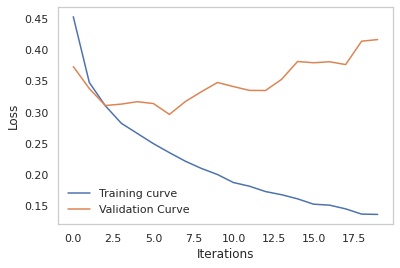

In [144]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid", {'axes.grid' : False})

plt.plot(train_loss_array, label = "Training curve")
plt.plot(val_loss_array, label = "Validation Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()


##### 2a. l2 loss

##### lambda = 1e-5

In [145]:
model = Network()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr, weight_decay=1e-5)

In [146]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 20
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  


print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")



# Calculate accuracy on test set


Epoch: 0 	Training Loss: 0.456737 	Training Accuracy:  0.832056

Epoch: 0 	Validation Loss: 0.379559 	Validation Accuracy:  0.859000
Test Accuracy:  0.853200

Epoch: 1 	Training Loss: 0.345916 	Training Accuracy:  0.870593

Epoch: 1 	Validation Loss: 0.343970 	Validation Accuracy:  0.875667
Test Accuracy:  0.865600

Epoch: 2 	Training Loss: 0.312045 	Training Accuracy:  0.882963

Epoch: 2 	Validation Loss: 0.325928 	Validation Accuracy:  0.884333
Test Accuracy:  0.871900

Epoch: 3 	Training Loss: 0.284884 	Training Accuracy:  0.892593

Epoch: 3 	Validation Loss: 0.323465 	Validation Accuracy:  0.884167
Test Accuracy:  0.875700

Epoch: 4 	Training Loss: 0.264772 	Training Accuracy:  0.900389

Epoch: 4 	Validation Loss: 0.298971 	Validation Accuracy:  0.897500
Test Accuracy:  0.880400

Epoch: 5 	Training Loss: 0.249483 	Training Accuracy:  0.903667

Epoch: 5 	Validation Loss: 0.302126 	Validation Accuracy:  0.891167
Test Accuracy:  0.881500

Epoch: 6 	Training Loss: 0.237236 	Training A

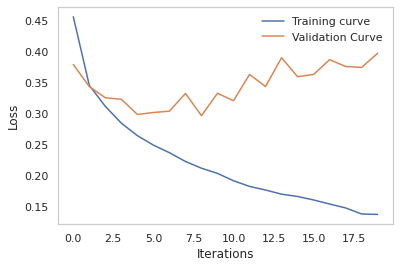

In [147]:
plt.plot(train_loss_array, label = "Training curve")
plt.plot(val_loss_array, label = "Validation Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()


##### lambda = 1e-4

In [148]:
model = Network()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr, weight_decay=1e-4)


Epoch: 0 	Training Loss: 0.455626 	Training Accuracy:  0.829500

Epoch: 0 	Validation Loss: 0.352774 	Validation Accuracy:  0.869833
Test Accuracy:  0.863200

Epoch: 1 	Training Loss: 0.348837 	Training Accuracy:  0.870444

Epoch: 1 	Validation Loss: 0.332900 	Validation Accuracy:  0.876333
Test Accuracy:  0.866900

Epoch: 2 	Training Loss: 0.315431 	Training Accuracy:  0.882222

Epoch: 2 	Validation Loss: 0.328415 	Validation Accuracy:  0.881500
Test Accuracy:  0.872900

Epoch: 3 	Training Loss: 0.294313 	Training Accuracy:  0.889130

Epoch: 3 	Validation Loss: 0.344605 	Validation Accuracy:  0.876167
Test Accuracy:  0.867800

Epoch: 4 	Training Loss: 0.275604 	Training Accuracy:  0.896111

Epoch: 4 	Validation Loss: 0.317419 	Validation Accuracy:  0.885333
Test Accuracy:  0.876700

Epoch: 5 	Training Loss: 0.261932 	Training Accuracy:  0.901444

Epoch: 5 	Validation Loss: 0.304361 	Validation Accuracy:  0.892500
Test Accuracy:  0.886000

Epoch: 6 	Training Loss: 0.251187 	Training A

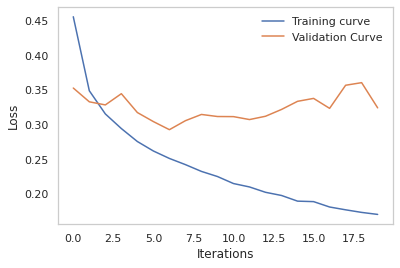

In [149]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 20
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  


print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")


plt.plot(train_loss_array, label = "Training curve")
plt.plot(val_loss_array, label = "Validation Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()



##### 2b. Dropout 

##### p = 0.1

In [151]:
#Define your network:
class Network(nn.Module):
  def __init__(self): #Can provide additional inputs for initialization
    #Define the network layer(s) and activation function(s)
    super(Network, self).__init__()
    self.fcL1 = nn.Linear(784, 512)
    self.fcAct1 = nn.ReLU()
    self.fcL2 = nn.Linear(512, 256)
    self.fcAct2 = nn.ReLU()
    self.out = nn.Linear(256, 10)

    # Dropout Layer
    self.dropout = nn.Dropout(0.1)

  def forward(self, input):
    #How does your model process the input?
    x = input.view(-1, 28 * 28)
    x = self.fcAct1(self.fcL1(x))
    x = self.dropout(x)
    x = self.fcAct2(self.fcL2(x))
    x = self.dropout(x)
    output = self.out(x)
    return output

model = Network()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)


Epoch: 0 	Training Loss: 0.469914 	Training Accuracy:  0.829982

Epoch: 0 	Validation Loss: 0.360154 	Validation Accuracy:  0.864833
Test Accuracy:  0.855500

Epoch: 1 	Training Loss: 0.362224 	Training Accuracy:  0.865796

Epoch: 1 	Validation Loss: 0.367022 	Validation Accuracy:  0.868333
Test Accuracy:  0.860900

Epoch: 2 	Training Loss: 0.327145 	Training Accuracy:  0.878667

Epoch: 2 	Validation Loss: 0.313982 	Validation Accuracy:  0.882833
Test Accuracy:  0.873300

Epoch: 3 	Training Loss: 0.304168 	Training Accuracy:  0.886833

Epoch: 3 	Validation Loss: 0.318039 	Validation Accuracy:  0.886000
Test Accuracy:  0.873400

Epoch: 4 	Training Loss: 0.288054 	Training Accuracy:  0.891796

Epoch: 4 	Validation Loss: 0.318992 	Validation Accuracy:  0.885000
Test Accuracy:  0.875200

Epoch: 5 	Training Loss: 0.275358 	Training Accuracy:  0.896907

Epoch: 5 	Validation Loss: 0.322131 	Validation Accuracy:  0.886833
Test Accuracy:  0.876800

Epoch: 6 	Training Loss: 0.261707 	Training A

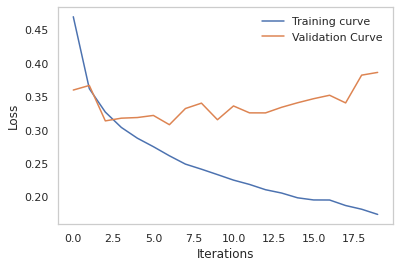

In [152]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 20
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  


print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")


plt.plot(train_loss_array, label = "Training curve")
plt.plot(val_loss_array, label = "Validation Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()



##### p = 0.2

In [155]:
#Define your network:
class Network(nn.Module):
  def __init__(self): #Can provide additional inputs for initialization
    #Define the network layer(s) and activation function(s)
    super(Network, self).__init__()
    self.fcL1 = nn.Linear(784, 512)
    self.fcAct1 = nn.ReLU()
    self.fcL2 = nn.Linear(512, 256)
    self.fcAct2 = nn.ReLU()
    self.out = nn.Linear(256, 10)

    # Dropout Layer
    self.dropout = nn.Dropout(0.2)

  def forward(self, input):
    #How does your model process the input?
    x = input.view(-1, 28 * 28)
    x = self.fcAct1(self.fcL1(x))
    x = self.dropout(x)
    x = self.fcAct2(self.fcL2(x))
    x = self.dropout(x)
    output = self.out(x)
    return output

model = Network()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)


Epoch: 0 	Training Loss: 0.488960 	Training Accuracy:  0.818981

Epoch: 0 	Validation Loss: 0.414414 	Validation Accuracy:  0.841833
Test Accuracy:  0.830200

Epoch: 1 	Training Loss: 0.380121 	Training Accuracy:  0.859778

Epoch: 1 	Validation Loss: 0.357336 	Validation Accuracy:  0.869333
Test Accuracy:  0.860500

Epoch: 2 	Training Loss: 0.349736 	Training Accuracy:  0.870481

Epoch: 2 	Validation Loss: 0.327690 	Validation Accuracy:  0.881000
Test Accuracy:  0.867100

Epoch: 3 	Training Loss: 0.329391 	Training Accuracy:  0.877537

Epoch: 3 	Validation Loss: 0.334806 	Validation Accuracy:  0.876333
Test Accuracy:  0.872900

Epoch: 4 	Training Loss: 0.316959 	Training Accuracy:  0.881926

Epoch: 4 	Validation Loss: 0.319520 	Validation Accuracy:  0.883500
Test Accuracy:  0.871800

Epoch: 5 	Training Loss: 0.299435 	Training Accuracy:  0.887778

Epoch: 5 	Validation Loss: 0.312129 	Validation Accuracy:  0.887667
Test Accuracy:  0.879400

Epoch: 6 	Training Loss: 0.289765 	Training A

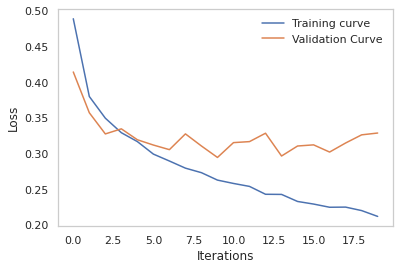

In [156]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 20
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  


print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")


plt.plot(train_loss_array, label = "Training curve")
plt.plot(val_loss_array, label = "Validation Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()



##### p = 0.3

In [158]:
#Define your network:
class Network(nn.Module):
  def __init__(self): #Can provide additional inputs for initialization
    #Define the network layer(s) and activation function(s)
    super(Network, self).__init__()
    self.fcL1 = nn.Linear(784, 512)
    self.fcAct1 = nn.ReLU()
    self.fcL2 = nn.Linear(512, 256)
    self.fcAct2 = nn.ReLU()
    self.out = nn.Linear(256, 10)

    # Dropout Layer
    self.dropout = nn.Dropout(0.3)

  def forward(self, input):
    #How does your model process the input?
    x = input.view(-1, 28 * 28)
    x = self.fcAct1(self.fcL1(x))
    x = self.dropout(x)
    x = self.fcAct2(self.fcL2(x))
    x = self.dropout(x)
    output = self.out(x)
    return output

model = Network()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)


Epoch: 0 	Training Loss: 0.510063 	Training Accuracy:  0.813630

Epoch: 0 	Validation Loss: 0.416662 	Validation Accuracy:  0.843833
Test Accuracy:  0.838500

Epoch: 1 	Training Loss: 0.403232 	Training Accuracy:  0.850889

Epoch: 1 	Validation Loss: 0.346981 	Validation Accuracy:  0.871500
Test Accuracy:  0.863500

Epoch: 2 	Training Loss: 0.372783 	Training Accuracy:  0.862759

Epoch: 2 	Validation Loss: 0.364132 	Validation Accuracy:  0.868500
Test Accuracy:  0.856700

Epoch: 3 	Training Loss: 0.352429 	Training Accuracy:  0.869815

Epoch: 3 	Validation Loss: 0.336145 	Validation Accuracy:  0.876500
Test Accuracy:  0.866800

Epoch: 4 	Training Loss: 0.338507 	Training Accuracy:  0.875352

Epoch: 4 	Validation Loss: 0.336217 	Validation Accuracy:  0.874667
Test Accuracy:  0.866000

Epoch: 5 	Training Loss: 0.327639 	Training Accuracy:  0.878037

Epoch: 5 	Validation Loss: 0.320997 	Validation Accuracy:  0.888000
Test Accuracy:  0.874900

Epoch: 6 	Training Loss: 0.322090 	Training A

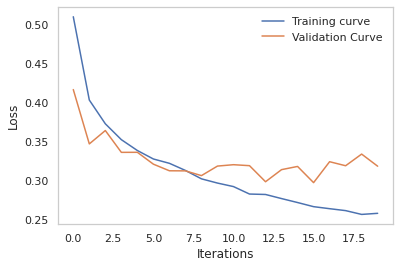

In [159]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 20
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  


print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")


plt.plot(train_loss_array, label = "Training curve")
plt.plot(val_loss_array, label = "Validation Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()



#### 3a. Weight Initialisation: Xavier

In [160]:
#Define your network:
class Network(nn.Module):
  def __init__(self): #Can provide additional inputs for initialization
    #Define the network layer(s) and activation function(s)
    super(Network, self).__init__()
    self.fcL1 = nn.Linear(784, 512)
    self.fcAct1 = nn.ReLU()
    self.fcL2 = nn.Linear(512, 256)
    self.fcAct2 = nn.ReLU()
    self.out = nn.Linear(256, 10)

    # Dropout Layer
    self.dropout = nn.Dropout(0.2)

    # Initialisation
    nn.init.xavier_normal_(self.fcL1.weight)
    nn.init.xavier_normal_(self.fcL2.weight)
    nn.init.xavier_normal_(self.out.weight)

  def forward(self, input):
    #How does your model process the input?
    x = input.view(-1, 28 * 28)
    x = self.fcAct1(self.fcL1(x))
    x = self.dropout(x)
    x = self.fcAct2(self.fcL2(x))
    x = self.dropout(x)
    output = self.out(x)
    return output

model = Network()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)


Epoch: 0 	Training Loss: 0.505083 	Training Accuracy:  0.817130

Epoch: 0 	Validation Loss: 0.388053 	Validation Accuracy:  0.858000
Test Accuracy:  0.842900

Epoch: 1 	Training Loss: 0.389219 	Training Accuracy:  0.856222

Epoch: 1 	Validation Loss: 0.351074 	Validation Accuracy:  0.876500
Test Accuracy:  0.860100

Epoch: 2 	Training Loss: 0.356098 	Training Accuracy:  0.867241

Epoch: 2 	Validation Loss: 0.378970 	Validation Accuracy:  0.865167
Test Accuracy:  0.855200

Epoch: 3 	Training Loss: 0.338769 	Training Accuracy:  0.875630

Epoch: 3 	Validation Loss: 0.327004 	Validation Accuracy:  0.885333
Test Accuracy:  0.872000

Epoch: 4 	Training Loss: 0.322084 	Training Accuracy:  0.880889

Epoch: 4 	Validation Loss: 0.328280 	Validation Accuracy:  0.882667
Test Accuracy:  0.873000

Epoch: 5 	Training Loss: 0.308329 	Training Accuracy:  0.884630

Epoch: 5 	Validation Loss: 0.317800 	Validation Accuracy:  0.887667
Test Accuracy:  0.872000

Epoch: 6 	Training Loss: 0.299137 	Training A

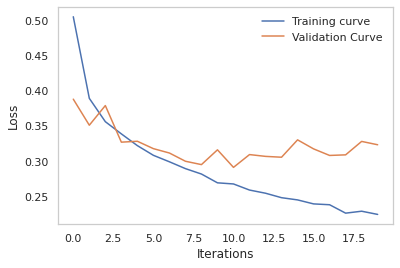

In [161]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 20
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  


print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")


plt.plot(train_loss_array, label = "Training curve")
plt.plot(val_loss_array, label = "Validation Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()



#### 3b. Weight Initialisation: Kaiming

In [165]:
#Define your network:
class Network(nn.Module):
  def __init__(self): #Can provide additional inputs for initialization
    #Define the network layer(s) and activation function(s)
    super(Network, self).__init__()
    self.fcL1 = nn.Linear(784, 512)
    self.fcAct1 = nn.ReLU()
    self.fcL2 = nn.Linear(512, 256)
    self.fcAct2 = nn.ReLU()
    self.out = nn.Linear(256, 10)

    # Dropout Layer
    self.dropout = nn.Dropout(0.2)

    # Initialisation
    nn.init.kaiming_normal_(self.fcL1.weight, mode='fan_in', nonlinearity='relu')
    nn.init.kaiming_normal_(self.fcL2.weight, mode='fan_in', nonlinearity='relu')
    nn.init.kaiming_normal_(self.out.weight, mode='fan_in', nonlinearity='relu')

  def forward(self, input):
    #How does your model process the input?
    x = input.view(-1, 28 * 28)
    x = self.fcAct1(self.fcL1(x))
    x = self.dropout(x)
    x = self.fcAct2(self.fcL2(x))
    x = self.dropout(x)
    output = self.out(x)
    return output

model = Network()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)


Epoch: 0 	Training Loss: 0.530251 	Training Accuracy:  0.810389

Epoch: 0 	Validation Loss: 0.397566 	Validation Accuracy:  0.854167
Test Accuracy:  0.844800

Epoch: 1 	Training Loss: 0.394435 	Training Accuracy:  0.854815

Epoch: 1 	Validation Loss: 0.373246 	Validation Accuracy:  0.860333
Test Accuracy:  0.850300

Epoch: 2 	Training Loss: 0.360142 	Training Accuracy:  0.867352

Epoch: 2 	Validation Loss: 0.349023 	Validation Accuracy:  0.868833
Test Accuracy:  0.867400

Epoch: 3 	Training Loss: 0.337110 	Training Accuracy:  0.874389

Epoch: 3 	Validation Loss: 0.318223 	Validation Accuracy:  0.885167
Test Accuracy:  0.875700

Epoch: 4 	Training Loss: 0.324354 	Training Accuracy:  0.879667

Epoch: 4 	Validation Loss: 0.309733 	Validation Accuracy:  0.888667
Test Accuracy:  0.874000

Epoch: 5 	Training Loss: 0.311560 	Training Accuracy:  0.881704

Epoch: 5 	Validation Loss: 0.323387 	Validation Accuracy:  0.880667
Test Accuracy:  0.877400

Epoch: 6 	Training Loss: 0.299882 	Training A

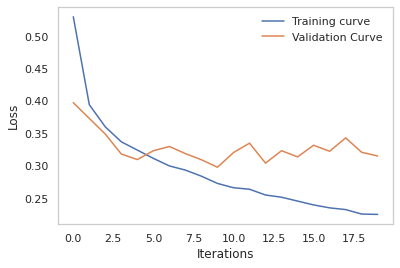

In [166]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 20
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  


print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")


plt.plot(train_loss_array, label = "Training curve")
plt.plot(val_loss_array, label = "Validation Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()



#### 3c. Weight Initialisation: Random normal

In [174]:
#Define your network:
class Network(nn.Module):
  def __init__(self): #Can provide additional inputs for initialization
    #Define the network layer(s) and activation function(s)
    super(Network, self).__init__()
    self.fcL1 = nn.Linear(784, 512)
    self.fcAct1 = nn.ReLU()
    self.fcL2 = nn.Linear(512, 256)
    self.fcAct2 = nn.ReLU()
    self.out = nn.Linear(256, 10)

    # Dropout Layer
    self.dropout = nn.Dropout(0.2)

    # Initialisation
    nn.init.normal_(self.fcL1.weight, mean=0, std=1.0)
    nn.init.normal_(self.fcL2.weight, mean=0, std=1.0)
    nn.init.normal_(self.out.weight, mean=0, std=1.0)

  def forward(self, input):
    #How does your model process the input?
    x = input.view(-1, 28 * 28)
    x = self.fcAct1(self.fcL1(x))
    x = self.dropout(x)
    x = self.fcAct2(self.fcL2(x))
    x = self.dropout(x)
    output = self.out(x)
    return output

model = Network()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)


Epoch: 0 	Training Loss: 1026.484710 	Training Accuracy:  0.653593

Epoch: 0 	Validation Loss: 184.109497 	Validation Accuracy:  0.801333
Test Accuracy:  0.791200

Epoch: 1 	Training Loss: 252.707061 	Training Accuracy:  0.728407

Epoch: 1 	Validation Loss: 81.166285 	Validation Accuracy:  0.793833
Test Accuracy:  0.784100

Epoch: 2 	Training Loss: 125.600201 	Training Accuracy:  0.710870

Epoch: 2 	Validation Loss: 27.944669 	Validation Accuracy:  0.718000
Test Accuracy:  0.705800

Epoch: 3 	Training Loss: 51.867643 	Training Accuracy:  0.634167

Epoch: 3 	Validation Loss: 10.309545 	Validation Accuracy:  0.630500
Test Accuracy:  0.619500

Epoch: 4 	Training Loss: 22.258463 	Training Accuracy:  0.561944

Epoch: 4 	Validation Loss: 5.025647 	Validation Accuracy:  0.560000
Test Accuracy:  0.545900

Epoch: 5 	Training Loss: 10.308909 	Training Accuracy:  0.512833

Epoch: 5 	Validation Loss: 3.006103 	Validation Accuracy:  0.484333
Test Accuracy:  0.473700

Epoch: 6 	Training Loss: 5.117

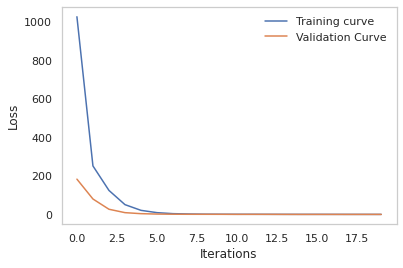

In [168]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 20
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  


print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")


plt.plot(train_loss_array, label = "Training curve")
plt.plot(val_loss_array, label = "Validation Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()



##### 4. Batch Normalization 

In [175]:
#Define your network:
class Network(nn.Module):
  def __init__(self): #Can provide additional inputs for initialization
    #Define the network layer(s) and activation function(s)
    super(Network, self).__init__()
    self.fcL1 = nn.Linear(784, 512)
    self.fcAct1 = nn.ReLU()
    self.bnorm1 = nn.BatchNorm1d(512)
    self.fcL2 = nn.Linear(512, 256)
    self.fcAct2 = nn.ReLU()
    self.bnorm2 = nn.BatchNorm1d(256)
    self.out = nn.Linear(256, 10)

    # Dropout Layer
    self.dropout = nn.Dropout(0.2)

    # Initialisation
    nn.init.xavier_normal_(self.fcL1.weight)
    nn.init.xavier_normal_(self.fcL2.weight)
    nn.init.xavier_normal_(self.out.weight)

  def forward(self, input):
    #How does your model process the input?
    x = input.view(-1, 28 * 28)
    x = self.fcAct1(self.fcL1(x))
    x = self.dropout(x)
    x = self.bnorm1(x)
    x = self.fcAct2(self.fcL2(x))
    x = self.dropout(x)
    x = self.bnorm2(x)
    output = self.out(x)
    return output

model = Network()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)


Epoch: 0 	Training Loss: 0.522299 	Training Accuracy:  0.814019

Epoch: 0 	Validation Loss: 0.500972 	Validation Accuracy:  0.858500
Test Accuracy:  0.846400

Epoch: 1 	Training Loss: 0.420820 	Training Accuracy:  0.845315

Epoch: 1 	Validation Loss: 0.518574 	Validation Accuracy:  0.864333
Test Accuracy:  0.856700

Epoch: 2 	Training Loss: 0.386260 	Training Accuracy:  0.859426

Epoch: 2 	Validation Loss: 0.451258 	Validation Accuracy:  0.868000
Test Accuracy:  0.862400

Epoch: 3 	Training Loss: 0.369188 	Training Accuracy:  0.865037

Epoch: 3 	Validation Loss: 0.433684 	Validation Accuracy:  0.878333
Test Accuracy:  0.867700

Epoch: 4 	Training Loss: 0.352142 	Training Accuracy:  0.869593

Epoch: 4 	Validation Loss: 0.453579 	Validation Accuracy:  0.877667
Test Accuracy:  0.865400

Epoch: 5 	Training Loss: 0.341201 	Training Accuracy:  0.873222

Epoch: 5 	Validation Loss: 0.456516 	Validation Accuracy:  0.883333
Test Accuracy:  0.872700

Epoch: 6 	Training Loss: 0.326563 	Training A

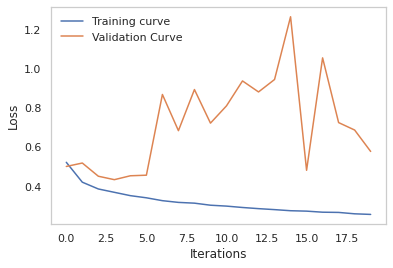

In [176]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 20
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  


print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")


plt.plot(train_loss_array, label = "Training curve")
plt.plot(val_loss_array, label = "Validation Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()



##### 5a. Learning rate change

In [177]:
#Define your network:
class Network(nn.Module):
  def __init__(self): #Can provide additional inputs for initialization
    #Define the network layer(s) and activation function(s)
    super(Network, self).__init__()
    self.fcL1 = nn.Linear(784, 512)
    self.fcAct1 = nn.ReLU()
    self.bnorm1 = nn.BatchNorm1d(512)
    self.fcL2 = nn.Linear(512, 256)
    self.fcAct2 = nn.ReLU()
    self.bnorm2 = nn.BatchNorm1d(256)
    self.out = nn.Linear(256, 10)

    # Dropout Layer
    self.dropout = nn.Dropout(0.2)

    # Initialisation
    nn.init.xavier_normal_(self.fcL1.weight)
    nn.init.xavier_normal_(self.fcL2.weight)
    nn.init.xavier_normal_(self.out.weight)

  def forward(self, input):
    #How does your model process the input?
    x = input.view(-1, 28 * 28)
    x = self.fcAct1(self.fcL1(x))
    x = self.dropout(x)
    x = self.bnorm1(x)
    x = self.fcAct2(self.fcL2(x))
    x = self.dropout(x)
    x = self.bnorm2(x)
    output = self.out(x)
    return output

model = Network()
lr = 0.0001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)


Epoch: 0 	Training Loss: 0.636541 	Training Accuracy:  0.776796

Epoch: 0 	Validation Loss: 0.395286 	Validation Accuracy:  0.861333
Test Accuracy:  0.848000

Epoch: 1 	Training Loss: 0.446854 	Training Accuracy:  0.840148

Epoch: 1 	Validation Loss: 0.364402 	Validation Accuracy:  0.870333
Test Accuracy:  0.862000

Epoch: 2 	Training Loss: 0.399766 	Training Accuracy:  0.855167

Epoch: 2 	Validation Loss: 0.350606 	Validation Accuracy:  0.872833
Test Accuracy:  0.865900

Epoch: 3 	Training Loss: 0.365994 	Training Accuracy:  0.867667

Epoch: 3 	Validation Loss: 0.356197 	Validation Accuracy:  0.876000
Test Accuracy:  0.869200

Epoch: 4 	Training Loss: 0.347013 	Training Accuracy:  0.874667

Epoch: 4 	Validation Loss: 0.319647 	Validation Accuracy:  0.886000
Test Accuracy:  0.877500

Epoch: 5 	Training Loss: 0.332718 	Training Accuracy:  0.878833

Epoch: 5 	Validation Loss: 0.370602 	Validation Accuracy:  0.883667
Test Accuracy:  0.874200

Epoch: 6 	Training Loss: 0.314886 	Training A

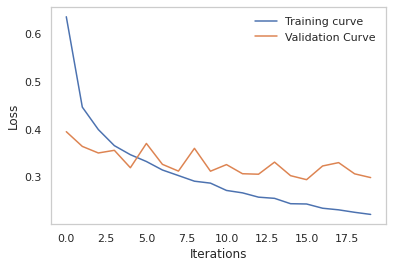

In [178]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 20
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  


print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")


plt.plot(train_loss_array, label = "Training curve")
plt.plot(val_loss_array, label = "Validation Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()



##### 5b. Number of epochs change


Epoch: 0 	Training Loss: 0.217130 	Training Accuracy:  0.918222

Epoch: 0 	Validation Loss: 0.294447 	Validation Accuracy:  0.900833
Test Accuracy:  0.892900

Epoch: 1 	Training Loss: 0.210631 	Training Accuracy:  0.919778

Epoch: 1 	Validation Loss: 0.358522 	Validation Accuracy:  0.897500
Test Accuracy:  0.887200

Epoch: 2 	Training Loss: 0.208071 	Training Accuracy:  0.921944

Epoch: 2 	Validation Loss: 0.354499 	Validation Accuracy:  0.901833
Test Accuracy:  0.889200

Epoch: 3 	Training Loss: 0.204003 	Training Accuracy:  0.923333

Epoch: 3 	Validation Loss: 0.352450 	Validation Accuracy:  0.899667
Test Accuracy:  0.891000

Epoch: 4 	Training Loss: 0.202399 	Training Accuracy:  0.924111

Epoch: 4 	Validation Loss: 0.388776 	Validation Accuracy:  0.900667
Test Accuracy:  0.889500

Epoch: 5 	Training Loss: 0.201999 	Training Accuracy:  0.923481

Epoch: 5 	Validation Loss: 0.402918 	Validation Accuracy:  0.902167
Test Accuracy:  0.891700

Epoch: 6 	Training Loss: 0.197366 	Training A

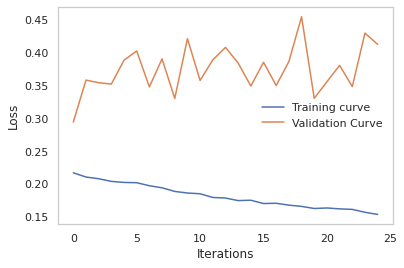

In [179]:


loss_data = {'train': [], 'val': []}
train_accuracy = []
train_loss_array = []

val_accuracy = []
val_loss_array= []
epochs = 25
test_accuracy = []
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0
  for x_train, y_train in train_loader:
    #Calculate training loss on model
    x_train, y_train = x_train, y_train 
    
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad() # resest the gradients 
    loss.backward() # compute backpropagation
    optimizer.step() # perform parameter update
    # compute model metrics
    with torch.no_grad():
      predictions = torch.max(y_train_pred, 1)[1]
     
      epoch_corrects += (predictions == y_train).sum()
      train_sample_counts += len(y_train)
      train_loss += loss.item() * x_train.size(0)
    # print(epoch)

  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')
  

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    y_val_pred = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      predictions = torch.max(y_val_pred, 1)[1]
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  val_accuracy.append(epoch_accuracy)
  val_loss_epoch = val_loss/val_sample_counts
  val_loss_array.append(val_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {val_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')
  test_accuracy.append(test())
  


print(f"Test accuracy for min validation: {test_accuracy[torch.min(torch.Tensor(val_loss_array), 0)[1]]}", 
f", Training loss: {train_loss_array[torch.min(torch.Tensor(val_loss_array), 0)[1]]}")


plt.plot(train_loss_array, label = "Training curve")
plt.plot(val_loss_array, label = "Validation Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

